In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [36]:
# Load the train_data.csv file
train_data = pd.read_csv(r"D:\Projects\health 4 - Basit Momin\healthcare\train_data.csv")

# Preview the first few rows of the train_data_dictionary.csv file
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [37]:
# Get column-wise null value counts
null_counts = train_data.isnull().sum()

# Filter columns with null values
columns_with_null = null_counts[null_counts > 0]

# Print columns with null values
print(columns_with_null)

Bed Grade             113
City_Code_Patient    4532
dtype: int64


In [38]:
from scipy.stats import skew

# Calculate skewness for "Bed Grade" and "City_Code_Patient" columns
bed_grade_skewness = skew(train_data['Bed Grade'].dropna())
city_code_patient_skewness = skew(train_data['City_Code_Patient'].dropna())

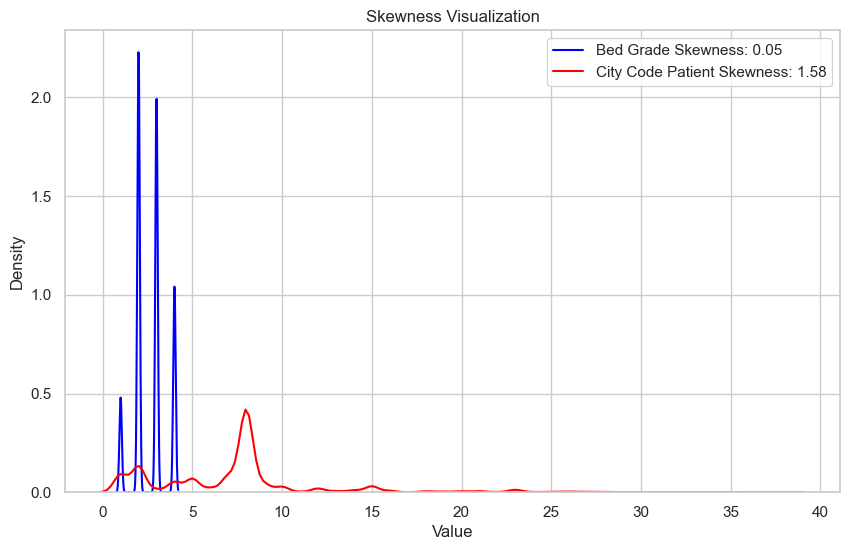

In [39]:
# Create density plots for skewness visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.kdeplot(train_data['Bed Grade'].dropna(), label=f"Bed Grade Skewness: {bed_grade_skewness:.2f}", color="blue")
sns.kdeplot(train_data['City_Code_Patient'].dropna(), label=f"City Code Patient Skewness: {city_code_patient_skewness:.2f}", color="red")
plt.title("Skewness Visualization")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [40]:
# Replace null values in 'Bed Grade' with the mean
mean_bed_grade = train_data['Bed Grade'].mean()
train_data['Bed Grade'].fillna(mean_bed_grade, inplace=True)

In [41]:
# Replace null values in 'City_Code_Patient' with the median
median_city_code_patient = train_data['City_Code_Patient'].median()
train_data['City_Code_Patient'].fillna(median_city_code_patient, inplace=True)

In [42]:
# Replace "No-20" with "11-20" in the "Stay" column & "Age" column
train_data['Stay'] = train_data['Stay'].replace('Nov-20', '11-20')
train_data['Age'] = train_data['Age'].replace('Nov-20', '11-20')

In [43]:
# drop the 'case_id' and 'Visitors with Patient' columns
train_data.drop(['case_id', 'Visitors with Patient'], axis=1, inplace=True)

In [44]:
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

correlation = {}  # Dictionary to store the correlations

# Convert "Stay" column to numeric representation using label encoding
label_encoder = LabelEncoder()
train_data['Stay'] = label_encoder.fit_transform(train_data['Stay'])

for column in train_data.columns:
    if train_data[column].dtype == 'object':
        # Convert non-numeric column to numeric representation
        train_data[column] = train_data[column].astype('category').cat.codes

In [45]:
# Calculate correlation with "Stay" column for all numeric columns
for column in train_data.columns:
    if column != 'Stay':
        corr, _ = pearsonr(train_data[column], train_data['Stay'])
        correlation[column] = corr

# Add the correlation of "Stay" with itself
correlation['Stay'] = 1.0

In [46]:
# Print the correlation values
for column, corr in correlation.items():
    print(column, corr)

Hospital_code 0.04284557472532887
Hospital_type_code 0.058591654312015004
City_Code_Hospital 0.00638097699968913
Hospital_region_code 0.011905353556710236
Available Extra Rooms in Hospital -0.12111984506714488
Department 0.03328738315619187
Ward_Type 0.18519082192887792
Ward_Facility_Code -0.00455234937090826
Bed Grade 0.025736513760104784
patientid 0.0011247864602723983
City_Code_Patient -0.009447488029072037
Type of Admission 0.02361699098485998
Severity of Illness -0.031187924905371544
Age 0.09416326795751223
Admission_Deposit -0.05207692726906829
Stay 1.0


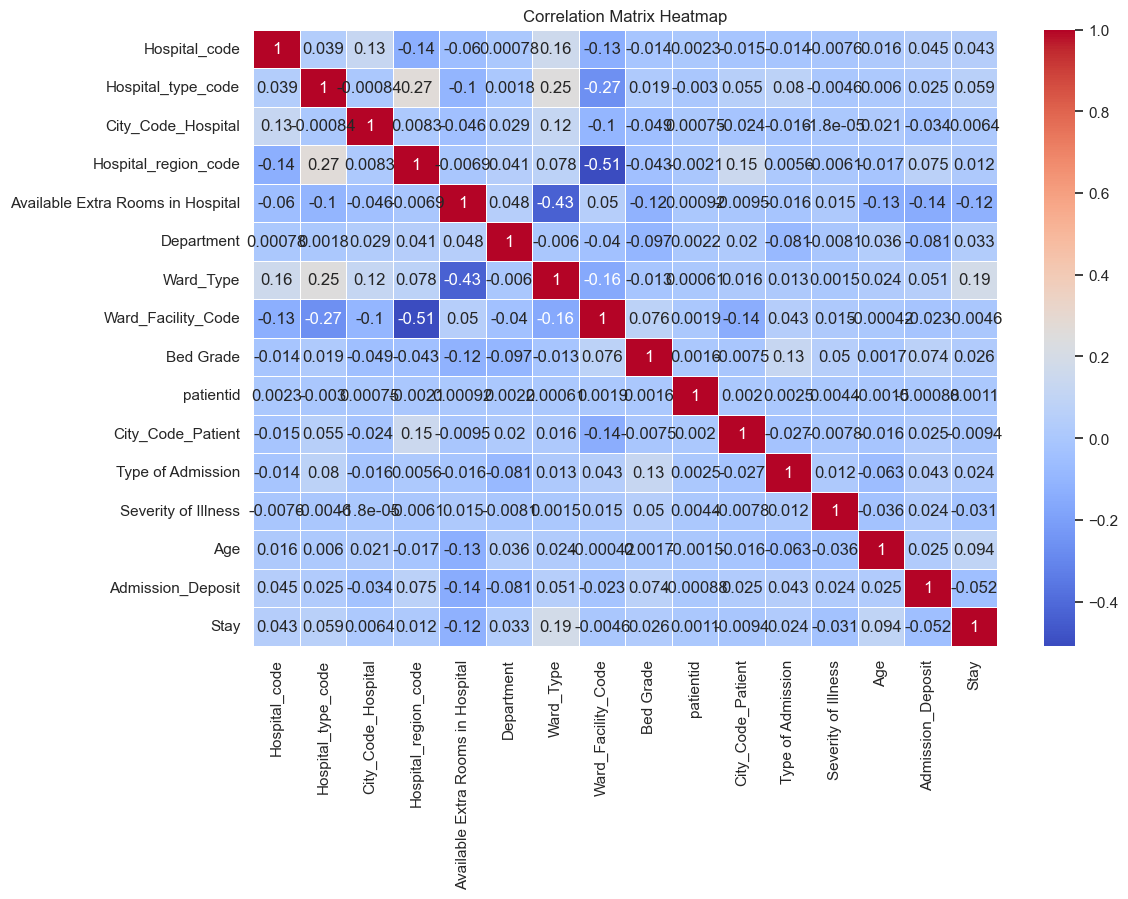

In [47]:
# Calculate correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [48]:
# Set the correlation threshold for dropping columns
threshold = 0.02

# Drop columns with correlations below the threshold
drop_columns = [column for column, corr in correlation.items() if abs(corr) < threshold]
train_data.drop(drop_columns, axis=1, inplace=True)

In [49]:
# Print the remaining columns
train_data.head()

,Hospital_code,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,Type of Admission,Severity of Illness,Age,Admission_Deposit,Stay
0,8,2,3,3,2,2.0,0,0,5,4911,0
1,2,2,2,3,3,2.0,1,0,5,5954,4
2,10,4,2,1,3,2.0,1,0,5,4745,3
3,26,1,2,3,2,2.0,1,0,5,7272,4
4,26,1,2,3,3,2.0,1,0,5,5558,4


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
# Set the correlation threshold for feature selection
threshold = 0.02

# Select features with weightage above the threshold
selected_features = [column for column, corr in correlation.items() if abs(corr) >= threshold]

In [52]:
# Prepare the feature matrix X and target vector y
X = train_data[selected_features]
y = train_data['Stay']

In [53]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings; warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [55]:
# Train the Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [56]:
# Make predictions on the testing set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Accuracy of Logistic Regression with Feature Selection: {:.2f}%".format(accuracy_logistic * 100))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=1))

Accuracy of Logistic Regression with Feature Selection: 87.55%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4689
           1       1.00      1.00      1.00     15561
           2       0.94      0.99      0.96     17603
           3       0.83      0.89      0.86     10981
           4       0.37      0.01      0.03      2357
           5       0.68      0.94      0.79      7128
           6       1.00      0.00      0.00       554
           7       0.40      0.15      0.22      2031
           8       0.35      0.12      0.18       941
           9       0.17      0.02      0.04       552
          10       0.59      0.89      0.71      1291

    accuracy                           0.88     63688
   macro avg       0.66      0.55      0.53     63688
weighted avg       0.85      0.88      0.85     63688

